In [1]:
import pandas as pd
import geopandas
from shapely.geometry import Point, Polygon, LineString

import glob
import os
import matplotlib.pyplot as plt


from datetime import datetime
from shapely.geometry import Point, Polygon, LineString
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output

from pymysql import*
import xlwt
import pandas.io.sql as sql
import time
import datetime
import civitatisAPI as civi

from google.cloud.exceptions import NotFound
from google.oauth2 import service_account
from bigquery import get_client
from sqlalchemy import create_engine


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
barcelona_adm = geopandas.read_file('/Users/macarenacruzceballos/Desktop/BEDER/BCN_UNITATS_ADM/0301100100_UNITATS_ADM_POLIGONS.json')
barcelona_adm =barcelona_adm.to_crs(epsg=4326)

In [3]:
barcenola_barrios = barcelona_adm[barcelona_adm['TIPUS_UA']=='DISTRICTE']
barcenola_grandbarrios = barcelona_adm[barcelona_adm['TIPUS_UA']=='GRANBARRI']
barcenola_manzanas = barcelona_adm[barcelona_adm['TIPUS_UA']=='BARRI']

In [6]:
usr = 'bederapp'
pss ='w5OWhwNPL1tU'
lnag = 'en'
session = civi.Civitatis(username=usr,password=pss)



In [12]:
barcelona_act = pd.DataFrame(session.get_destination_activities(35,'en'))
latitude = []
longitude = []
for address in barcelona_act['address']:
    latitude.append(address['latitude'])
    longitude.append(address['longitude'])

barcelona_act['latitude'] = latitude
barcelona_act['longitude'] = longitude

In [14]:
barcelona_act['geometry'] = barcelona_act.apply(lambda x: Point(x['longitude'], x['latitude']), axis=1)
barcelona_act = geopandas.GeoDataFrame(barcelona_act, crs='epsg:4326')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [18]:
barcelona_act[barcelona_act['latitude']==0]

,id,type,lang,destinationId,title,voucherType,relatedActivities,score,reviews,url,...,MinimumPaxPerBooking,infoVoucher,duration,advance,address,accessibility,rates,latitude,longitude,geometry
3,146569,1,en,35,Garrotxa Medieval Towns Tour,0,"[{'id': 139486, 'lang': 'es'}, {'id': 146570, ...",6.00,10,https://www.civitatis.com/en/barcelona/garrotx...,...,1.0,"<p>The day before the activity, the local prov...","{'min': 600, 'max': 660, 'duration': 660}","{'days': 0, 'hour': None, 'minutes_before': 0}","{'address': '', 'shortAddress': '', 'latitude'...","{'code': 0, 'description': None}","[{'id': 0, 'text': 'Tour in English', 'categor...",0.0,0.0,POINT (0.00000 0.00000)
6,142906,1,en,35,"Ampurias, Montgrí Natural Park & Medes Islands...",0,"[{'id': 139237, 'lang': 'es'}, {'id': 142907, ...",2.00,1,https://www.civitatis.com/en/barcelona/ampuria...,...,1.0,<p>We'll pick you up <strong>at the hotel in B...,"{'min': 600, 'max': 0, 'duration': 600}","{'days': 0, 'hour': None, 'minutes_before': None}","{'address': '', 'shortAddress': '', 'latitude'...","{'code': 0, 'description': None}","[{'id': 0, 'text': 'Tour in English', 'categor...",0.0,0.0,POINT (0.00000 0.00000)
7,142445,1,en,35,"Vic, Rupit & Besalú Excursion",0,"[{'id': 138474, 'lang': 'es'}, {'id': 142446, ...",8.67,3,https://www.civitatis.com/en/barcelona/vic-rup...,...,NaN,<p>We'll pick you up at your hotel between 8&n...,"{'min': 600, 'max': 0, 'duration': 600}","{'days': 0, 'hour': None, 'minutes_before': 1440}","{'address': '', 'shortAddress': '', 'latitude'...","{'code': 0, 'description': None}","[{'id': 0, 'text': 'Tour in English', 'categor...",0.0,0.0,POINT (0.00000 0.00000)
8,140663,1,en,35,Montserrat Hot Air Balloon Ride,0,"[{'id': 138157, 'lang': 'es'}, {'id': 140664, ...",0.00,1,https://www.civitatis.com/en/barcelona/montser...,...,1.0,<p>We'll pick you up at 5 am from&nbsp;your&nb...,"{'min': 390, 'max': 0, 'duration': 390}","{'days': 0, 'hour': None, 'minutes_before': 600}","{'address': '', 'shortAddress': '', 'latitude'...","{'code': 0, 'description': None}","[{'id': 0, 'text': 'Tour in English', 'categor...",0.0,0.0,POINT (0.00000 0.00000)
28,119267,1,en,35,Go City: Barcelona Explorer Pass,0,"[{'id': 103731, 'lang': 'es'}, {'id': 119268, ...",5.63,16,https://www.civitatis.com/en/barcelona/explore...,...,NaN,<p>This voucher isn't a valid ticket and canno...,"{'min': 0, 'max': 0, 'duration': 0}","{'days': 0, 'hour': None, 'minutes_before': None}","{'address': '', 'shortAddress': '', 'latitude'...","{'code': 130, 'description': 'Yes, most areas ...","[{'id': 0, 'text': 'Go Barcelona Explorer Pass...",0.0,0.0,POINT (0.00000 0.00000)
32,100935,1,en,35,Tarragona & Sitges Day Trip,0,"[{'id': 98639, 'lang': 'es'}, {'id': 98696, 'l...",8.71,14,https://www.civitatis.com/en/barcelona/tarrago...,...,1.0,<p>At 9 am we'll pick you up from the hotel in...,"{'min': 600, 'max': 0, 'duration': 600}","{'days': 0, 'hour': None, 'minutes_before': 2880}","{'address': '', 'shortAddress': '', 'latitude'...","{'code': 121, 'description': 'Yes, only for fo...","[{'id': 0, 'text': 'General', 'categories': [{...",0.0,0.0,POINT (0.00000 0.00000)
33,97796,2,en,35,Barcelona Layover Tour,0,"[{'id': 91699, 'lang': 'es'}, {'id': 97149, 'l...",10.00,1,https://www.civitatis.com/en/barcelona/layover...,...,NaN,<p>The departure time of the tour depends on y...,"{'min': 180, 'max': 420, 'duration': 420}","{'days': 1, 'hour': '00:00', 'minutes_before':...","{'address': '', 'shortAddress': '', 'latitude'...","{'code': 200, 'description': 'No, not suitable...","[{'id': 0, 'text': '3 hour tour without guide'...",0.0,0.0,POINT (0.00000 0.00000)
51,80339,1,en,35,Cardona and Montserrat Trip,0,"[{'id': 3353, 'lang': 'es'}, {'id': 19894, 'la...",9.90,20,https://www.civitatis.com/en/barcelona/cardona...,...,2.0,<p>We'll pick you up from your hotel at the ag...,"{'min': 600, 'max': 0, 'duration': 600}","{'days': 1, 'hour': '12:00', 'minutes_before':...","{'address': '', 'shortAddress': '', 'latitude'...","{'cod

(41.3, 41.5)

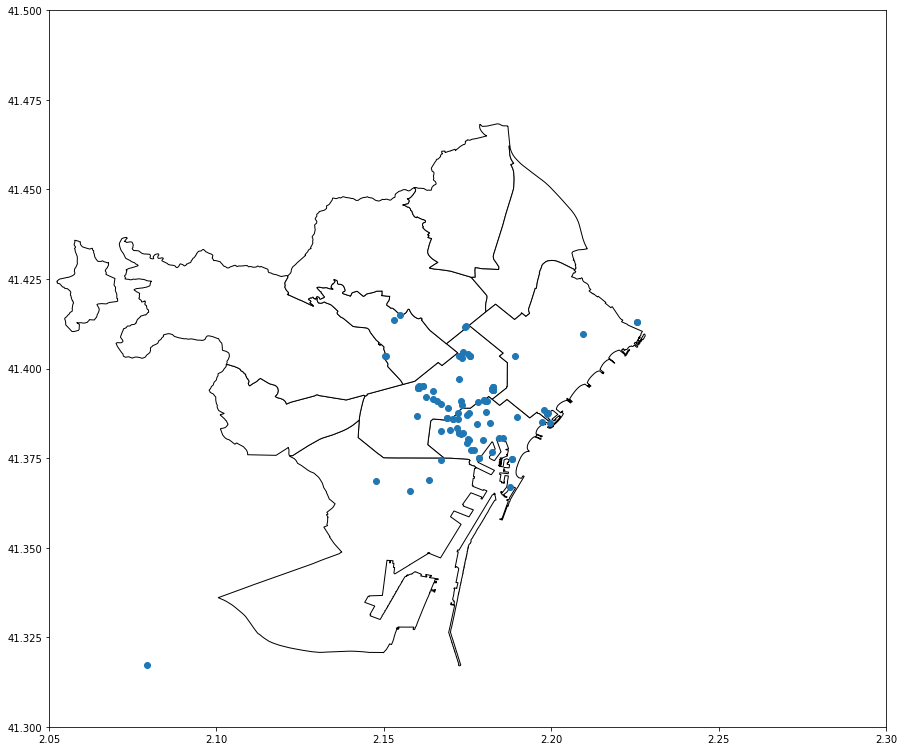

In [20]:
ax=barcenola_barrios.plot(facecolor='white',edgecolor = 'k',figsize=(15,15))
barcelona_act.plot(ax=ax)
ax.set_xlim(2.05, 2.30)
ax.set_ylim(41.30, 41.50)

In [21]:
barcelona_act_barri = geopandas.sjoin(barcelona_act,barcenola_barrios,how='left',predicate='within')

In [23]:
barcelona_act_barri=barcelona_act_barri[barcelona_act_barri['AREA'].notna()]

In [25]:
barcelona_act_barri.columns

Index(['id', 'type', 'lang', 'destinationId', 'title', 'voucherType',
       'relatedActivities', 'score', 'reviews', 'url', 'description', 'photos',
       'typologies', 'amountType', 'minimumPrice', 'isFreeTour', 'currency',
       'originalPrice', 'included', 'notIncluded', 'cancelPolicy',
       'cancelPolicies', 'MinimumPaxPerBooking', 'infoVoucher', 'duration',
       'advance', 'address', 'accessibility', 'rates', 'latitude', 'longitude',
       'geometry', 'index_right', 'FID', 'ID_ANNEX', 'ANNEXDESCR', 'ID_TEMA',
       'TEMA_DESCR', 'ID_CONJUNT', 'CONJ_DESCR', 'ID_SUBCONJ', 'SCONJ_DESC',
       'ID_ELEMENT', 'ELEM_DESCR', 'NIVELL', 'NDESCR_CA', 'NDESCR_ES',
       'NDESCR_EN', 'TERME', 'DISTRICTE', 'BARRI', 'AEB', 'SEC_CENS',
       'GRANBARRI', 'ZUA', 'AREA_I', 'LITERAL', 'PERIMETRE', 'AREA', 'CODI_UA',
       'TIPUS_UA', 'NOM', 'WEB1', 'WEB2', 'WEB3', 'FHEX_COLOR', 'Shape_Leng',
       'Shape_Area'],
      dtype='object')

In [30]:
barcelona_act_barri= barcelona_act_barri[['id', 'type', 'lang', 'destinationId', 'title', 'voucherType',
       'relatedActivities', 'score', 'reviews', 'url', 'description', 'photos',
       'typologies', 'amountType', 'minimumPrice', 'isFreeTour', 'currency',
       'originalPrice', 'included', 'notIncluded', 'cancelPolicy',
       'cancelPolicies', 'MinimumPaxPerBooking', 'infoVoucher', 'duration',
       'advance', 'address', 'accessibility', 'rates','NOM']]

In [31]:
barcelona_act_barri.to_excel('Activities_subcities.xlsx')

In [32]:
spain = geopandas.read_file('/Users/macarenacruzceballos/Desktop/EXPERIENCES-IMPLEMENTATION2022/Projects/Activities Implementation/georef-spain-municipio.geojson')

In [37]:
comunidades = geopandas.read_file('/Users/macarenacruzceballos/Desktop/EXPERIENCES-IMPLEMENTATION2022/Projects/Activities Implementation/georef-spain-comunidad-autonoma-millesime.geojson')

In [40]:
comunidades.sample(10)

,acom_name,acom_code,acom_area_code,acom_type,acom_name_local,acom_iso3166_code,year,geometry
5,Canarias,05,ESP,autonomous communities,None,CN,2019,"MULTIPOLYGON (((-17.96066 27.69256, -17.95840 ..."
3,Aragón,02,ESP,autonomous communities,None,AR,2020,"POLYGON ((-1.16519 40.01010, -1.16332 39.99982..."
38,Principado de Asturias,03,ESP,autonomous communities,None,AS,2021,"MULTIPOLYGON (((-4.78968 43.43288, -4.78858 43..."
25,Región de Murcia,14,ESP,autonomous communities,None,MC,2020,"MULTIPOLYGON (((-0.76147 37.78871, -0.75913 37..."
2,Aragón,02,ESP,autonomous communities,None,AR,2021,"POLYGON ((-1.44886 40.14534, -1.44555 40.14359..."
31,Castilla-La Mancha,08,ESP,autonomous communities,None,CM,2021,"MULTIPOLYGON (((-5.33598 40.11582, -5.33962 40..."
52,Andalucía,01,ESP,autonomous communities,None,AN,2019,"MULTIPOLYGON (((-3.03529 35.93767, -3.03312 35..."
51,Principado de Asturias,03,ESP,autonomous communities,None,AS,2020,"MULTIPOLYGON (((-4.78968 43.43288, -4.78858 43..."
18,La Rioja,17,ESP,autonomous communities,None,RI,2020,"POLYGON ((-2.85807 42.63838, -2.85960 42.63649..."
26,Ciudad Autónoma de Melilla,19,ESP,autonomous communities,None,ML,2021,"POLYGON ((-2.95264 35.32030, -2.96005 35.31595..."


<AxesSubplot:>

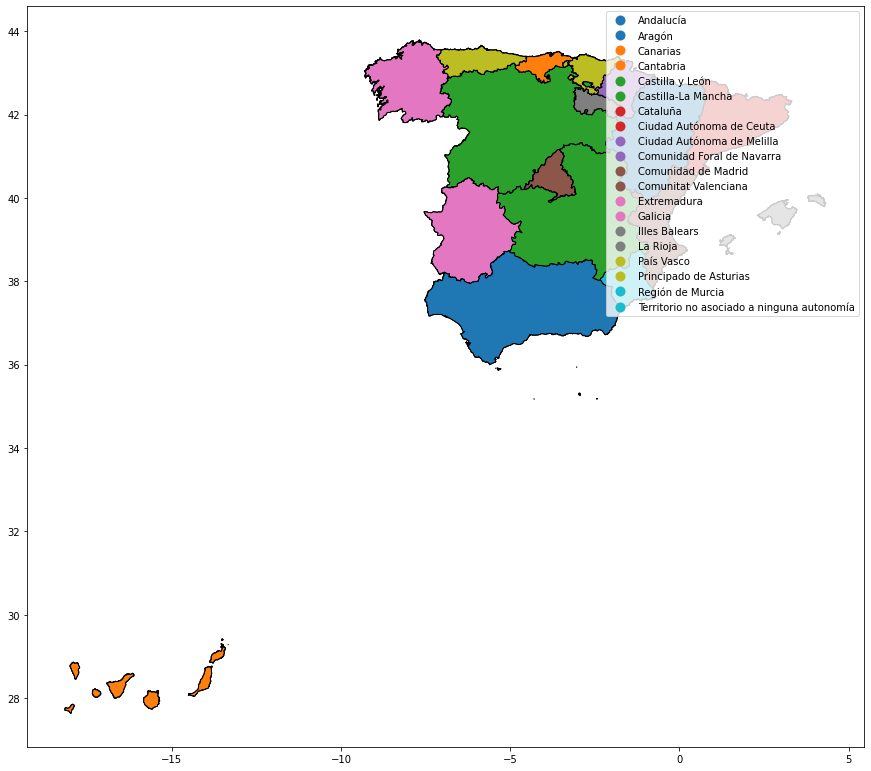

In [42]:
comunidades.plot(facecolor='white',edgecolor = 'k',figsize=(15,15),column='acom_name',legend=True)

In [43]:
all_act = pd.read_csv('/Users/macarenacruzceballos/Desktop/EXPERIENCES-IMPLEMENTATION2022/Projects/Activities Implementation/all_activities03_08_2022.csv')

In [45]:
all_act['geometry'] = all_act.apply(lambda x: Point(x['longitude'], x['latitude']), axis=1)
all_act = geopandas.GeoDataFrame(all_act, crs='epsg:4326')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


(26.0, 44.0)

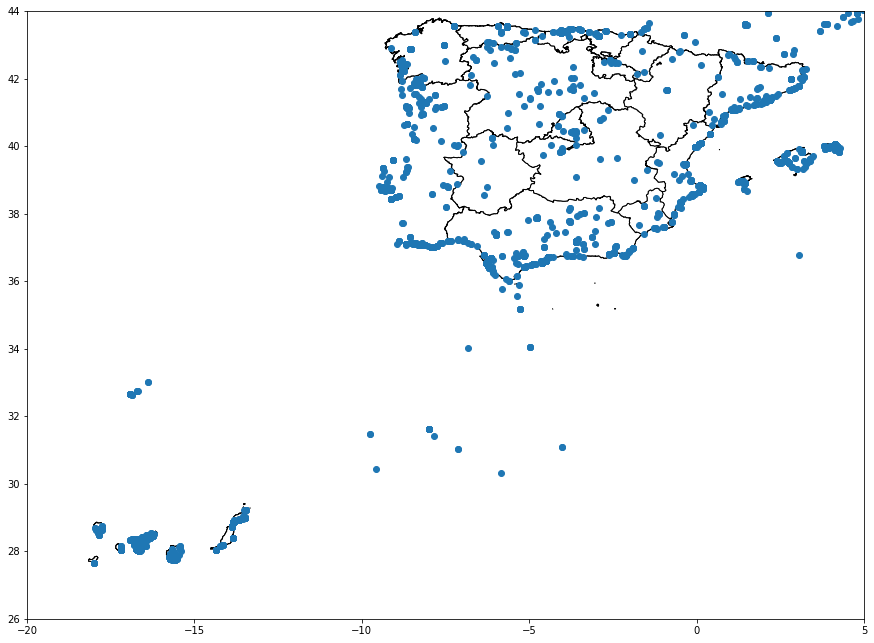

In [52]:
ax=comunidades.plot(facecolor='white',edgecolor = 'k',figsize=(15,15))
all_act.plot(ax=ax)
ax.set_xlim(-20, 5)
ax.set_ylim(26, 44)

In [55]:
comunidades_act = geopandas.sjoin(all_act,comunidades,how='left',predicate='within')
comunidades_act=comunidades_act[comunidades_act['acom_name'].notna()]

In [56]:
comunidades_act.columns

Index(['id', 'type', 'lang', 'destinationId', 'title', 'voucherType',
       'relatedActivities', 'score', 'reviews', 'url', 'description', 'photos',
       'typologies', 'amountType', 'minimumPrice', 'isFreeTour', 'currency',
       'originalPrice', 'included', 'notIncluded', 'cancelPolicy',
       'cancelPolicies', 'MinimumPaxPerBooking', 'infoVoucher', 'duration',
       'advance', 'address', 'accessibility', 'rates', 'latitude', 'longitude',
       'geometry', 'index_right', 'acom_name', 'acom_code', 'acom_area_code',
       'acom_type', 'acom_name_local', 'acom_iso3166_code', 'year'],
      dtype='object')

In [ ]:
regions_countries = pd.read_csv('/Users/macarenacruzceballos/Desktop/regions_withgeo.csv')